# Semantic Link & Semantic Link Labs


## 1. Install Libraries

### Semantic Link is installed by default
### Semantic Link Labs would need to be installed

In [1]:
#!pip install -U semantic-link-labs

StatementMeta(, a47dabc6-6652-439d-8887-8d16c8a96f30, 68, Finished, Available, Finished)

In [1]:
# Import semantic link and alias
import sempy.fabric as fabric
from sempy.relationships import plot_relationship_metadata

dataset_name = "Hyrule10K"

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 3, Finished, Available, Finished)

## 2. Explore semantic model

In [2]:
df_datasets = fabric.list_datasets()
df_datasets

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 4, Finished, Available, Finished)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,Hyrule10K,ba5dab1c-6bb8-4299-8370-bff27acb9b73,2023-05-04 14:36:12,NaT


In [3]:
df_tables = fabric.list_tables(dataset_name)
df_tables

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 5, Finished, Available, Finished)

,Name,Description,Hidden,Data Category,Type
0,Product,,False,,Table
1,Sales,,False,,Table
2,Store,,False,,Table
3,Date,,False,,Table
4,Customer,,False,,Table


StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 6, Finished, Available, Finished)

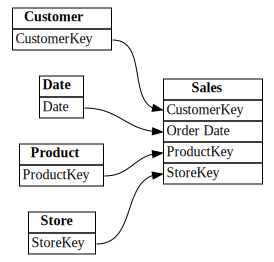

In [4]:
hyruleSemanticModel = "Hyrule10K"
relationships = fabric.list_relationships(hyruleSemanticModel)

plot_relationship_metadata(relationships)

In [5]:
df_columns = fabric.list_tables(dataset_name, include_columns=True)
df_columns[df_columns["Name"] == "Sales"]

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 7, Finished, Available, Finished)

,Name,Description,Hidden,Data Category,Type,Column
1,Sales,,False,,Table,Order Number
1,Sales,,False,,Table,Line Number
1,Sales,,False,,Table,Order Date
1,Sales,,False,,Table,Delivery Date
1,Sales,,False,,Table,CustomerKey
1,Sales,,False,,Table,StoreKey
1,Sales,,False,,Table,ProductKey
1,Sales,,False,,Table,Quantity
1,Sales,,False,,Table,Unit Price
1,Sales,,False,,Table,Net Price


In [6]:
df_measures = fabric.list_measures(dataset_name)
df_measures

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 8, Finished, Available, Finished)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,Sales,Sales Amount,"\nSUMX( Sales, \n Sales[Quantity] * Sales[Unit...",Decimal,False,,,"#,0.0",,None,None
1,Sales,#Sales,COUNTROWS(Sales),Int64,False,,,0,,None,None
2,Sales,#LargeSales_Slow,"CALCULATE(COUNTROWS(Sales), FILTER(Sales, Sale...",Int64,False,,,0,,None,None


In [7]:
df_table = fabric.read_table(dataset_name, "Product")
df_table.head(5)

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 9, Finished, Available, Finished)

,ProductKey,Product Code,Product Name,Manufacturer,Brand,Color,Weight Unit Measure,Weight,Unit Cost,Unit Price,Subcategory Code,Subcategory,Category Code,Category
0,1707,0702001,MGS Dal of Honor Airborne M150,Tailspin Toys,Tailspin Toys,Silver,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
1,1708,0702002,MGS Collector's M160,Tailspin Toys,Tailspin Toys,Black,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
2,1709,0702003,MGS Gears of War M170,Tailspin Toys,Tailspin Toys,Blue,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
3,1710,0702004,MGS Age of Empires III: The Asian Dynasties M180,Tailspin Toys,Tailspin Toys,Silver,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
4,1711,0702005,MGS Age of Empires III: The Asian Dynasties M190,Tailspin Toys,Tailspin Toys,Black,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys


## 3. Alternate Method - Set Spark settings

In [8]:
spark.conf.set("spark.sql.catalog.pbi", "com.microsoft.azure.synapse.ml.powerbi.PowerBICatalog")

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 10, Finished, Available, Finished)

In [9]:
df = spark.sql("SHOW TABLES FROM pbi")
display(df)

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 11, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5f9ac12f-55af-4da0-b5f3-7a9daa3d4478)

## 4. Measures and DAX

In [10]:
fabric.evaluate_measure(dataset_name, measure="Sales Amount")

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 12, Finished, Available, Finished)

,Sales Amount
0,13131568.507


### GroupBy Columns

In [11]:
fabric.evaluate_measure(dataset_name, measure="Sales Amount", groupby_columns=["Product[Brand]", "Product[Category]"])

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 13, Finished, Available, Finished)

,Brand,Category,Sales Amount
0,A. Datum,Cameras and camcorders,157162.57
1,Adventure Works,Computers,1757321.125
2,Adventure Works,Home Appliances,76160.114
3,Adventure Works,TV and Video,1104993.986
4,Contoso,Audio,51316.412
5,Contoso,Cameras and camcorders,120485.093
6,Contoso,Cell phones,280068.624
7,Contoso,Computers,351031.1
8,Contoso,Home Appliances,1045259.625
9,Contoso,"Music, Movies and Audio Books",442996.744


### Evaluate DAX

In [12]:
fabric.evaluate_dax(
    dataset="Hyrule10K",
    dax_string="""  
        EVALUATE
        SUMMARIZECOLUMNS(
            "Sales Amount", [Sales Amount]
        )
    """
)

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 14, Finished, Available, Finished)

,[Sales Amount]
0,13131568.507


### DAX Magic Cell

In [13]:
# Load %%dax cell magic
%load_ext sempy

StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 15, Finished, Available, Finished)

In [14]:
%%dax "Hyrule10K"

EVALUATE
SUMMARIZECOLUMNS(
"Sales Amount",[Sales Amount]
)


StatementMeta(, ce816f8e-7ae0-409c-9264-54b4c95ae72b, 16, Finished, Available, Finished)

,[Sales Amount]
0,13131568.507
